In [2]:
import os
path = '/content/drive/My Drive/人生KPI/工作坊/1091120_NQU_AI'
os.chdir(path)
print('Move to WorkSpace : ()')

Move to WorkSpace : ()


In [3]:
import torchvision.models as models
#trg_model = models.mobilenet_v2()
trg_model = models.mobilenet_v2(pretrained=True)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [4]:
from PIL import Image
img_path = 'images/image.jpg'
img_pil = Image.open(img_path)
print(f'Org Size: {img_pil.size}')

Org Size: (400, 600)




Tensor Size: torch.Size([3, 224, 224])
Target Size: torch.Size([1, 3, 224, 224])


Predict Shape:  torch.Size([1, 1000])


        [sofmax]        
Before    	After     
2.02119   	0.00000   
16.00339  	0.53150   
14.93940  	0.18341   
11.28520  	0.00475   
7.75794   	0.00014   


tensor(281)
tabby, tabby cat

tensor(0.5315)
Result | tabby, tabby cat  | 0.53150


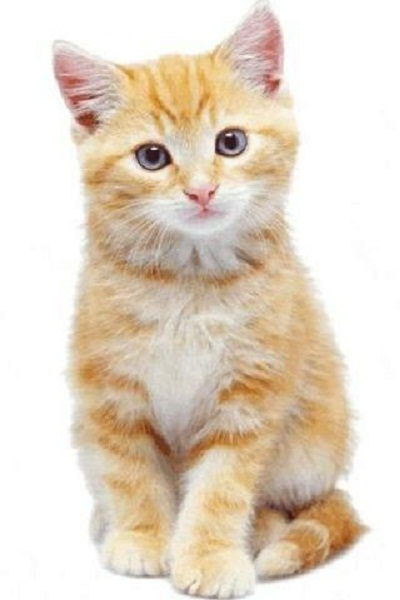

In [6]:
from torchvision import datasets, transforms as T
trans = T.Compose([
    T.Resize(256),
    T.CenterCrop(224), 
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

print('\n')

img_tensor = trans(img_pil)
print(f"Tensor Size: {img_tensor.shape}")#224,224,3

img_tensor = img_tensor.unsqueeze(0) #1,224,224,3
print(f"Target Size: {img_tensor.shape}")

print('\n')

import torch
from torch import nn

with torch.no_grad():
    
    trg_model.eval()
    predict = trg_model(img_tensor)
    print('Predict Shape: ', predict.shape)
    
    print('\n')

    softmax = nn.Softmax(dim=0)
    predict_sofmax = softmax(predict[0])
    print('{:^24}\n{:10}\t{:10}'.format('[sofmax]','Before','After'))
    for i in range(280,285): print( '{:<10.5f}\t{:<10.5f}'.format(predict[0,i], predict_sofmax[i]) )
    
    print('\n')
    
    import numpy as np
    f = open('labels/imagenet_classes.txt', 'r')
    content = f.readlines()
    res = content[torch.argmax(predict_sofmax)].replace('\n',' ')
    value = torch.max(predict_sofmax)
    print("="*10)
    print(torch.argmax(predict_sofmax))
    print(content[torch.argmax(predict_sofmax)])
    print(torch.max(predict_sofmax))
    print("="*10)
    print("Result | {} | {:.5f}".format(res , value))
    
    from IPython.display import display, Image
    display(Image(img_path))

    print('\n')